<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" /><br>
                            __Exploratory Data Analysis__

## Table of Content

1. [Problem Statement](#section1)<br>
    -1.1 [INTRODUCTION](#section101)<br>
    -1.2 [Data Source and Dataset](#section102)<br>
2. [Load the Packages and Data](#section2)<br>
3. [Data Profiling](#section3)<br>
    -3.1 [Is there a relationship between sugarpercent and winpercent](#section301)<br>
    -3.2 [Is there a relationship between pricepercent and winpercent](#section302)<br>
    -3.3 [Most popular and least popular candy](#section303)<br>
4. [Model Training](#section4)<br>

## 1. PROBLEM STATEMENT

The dataset contains study of candy data.In this project,we will analyse as such
     Which is the best popular and least popular candy.<br>
     What is the flavour of the least and best popular candy.<br>
     Predictive modeling

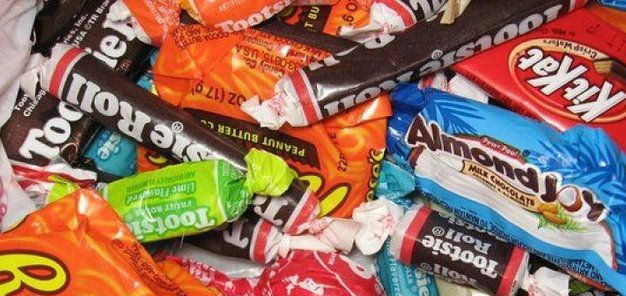

<a id=section101></a>
### 1.1 INTRODUCTION
Exploratory Data Analysis (EDA) is the series of asking questions and applying statistics and visualization techniques to answer those questions and to uncover the hidden insights from the data.A case study on the candy data set is done to explore the most common EDA techniques.

<a id=section102></a>
### 1.2 Data Source and DataSet

__a__ How was it collected

-__Name__: Candy Data
<br>
-__Description__: The data set contains attributes like the different candies,the flavour of the candy if it is chocolate or fruity or caramel or peanutmondy and so on and its corresponding sugar percentage, winpercentage and price percentage.
<br>
-__Is it a Sample data__: Yes, it is a sample set of 87 rows.
    


## 2. Load the Packages and Data

In [1]:
#import the libraries
import numpy as np                                                               #linear algebra
import pandas as pd                                                              #data processing and accessing i/o csv files
import pandas_profiling as pp
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline 
from sklearn import metrics
import seaborn as sns
sns.set()
import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore')
import math


#import the candy data file under the dir https://github.com/insaid2018/Term-2/blob/master/Projects/candy-data.csv

source_data = pd.read_csv(r"https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/candy-data.csv") 

source_data.head()                                                               # read the first 5 lines of the data
print(source_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.7+ KB
None


## 3. Data Profiling

In [2]:
source_data.dtypes                                                                 # display the data type of each variable

competitorname       object
chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object

In [3]:
source_data.head()                                                               # display the first 5 rows of source data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [4]:
source_data.describe(include='all')                                           # displays the statistics

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
unique,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Tootsie Roll Juniors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,NaN,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998


In [6]:
print("Number of rows:" +str(source_data.shape[0]))
print("Number of rows:" +str(source_data.shape[1]))
print("columns :" + "," .join(source_data.columns))

Number of rows:85
Number of rows:13
columns :competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent


In [8]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(source_data)
profile.to_file(outputfile="myoutputfile.html") 

_Observations_
<br>
1.The sample set has 85 rows with no null values in it.
<br>
2.The flavor of each candy if it contains chocolate or fruity or caramel or peanut almonds or rice crisp wafers is indicated by 1 or 0.
<br>
3.If it is 1 then it indicates, that the candy has that particular flavor. If it is 0 then that ia absent.
<br>
4.pluribus indicates if it is many candies in a bag or box.
<br>
5.Sugarpercent indicates the the percentile of sugar it falls with in the data set.

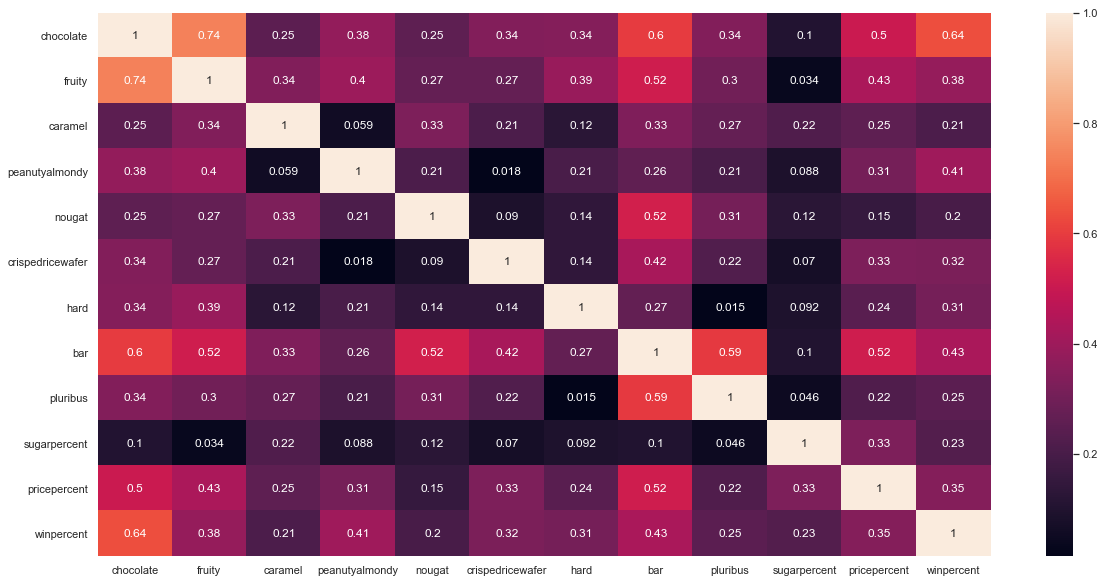

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(source_data.corr().abs(),annot=True)

In [11]:
winners = source_data[source_data.winpercent>source_data.winpercent.quantile(.6)]

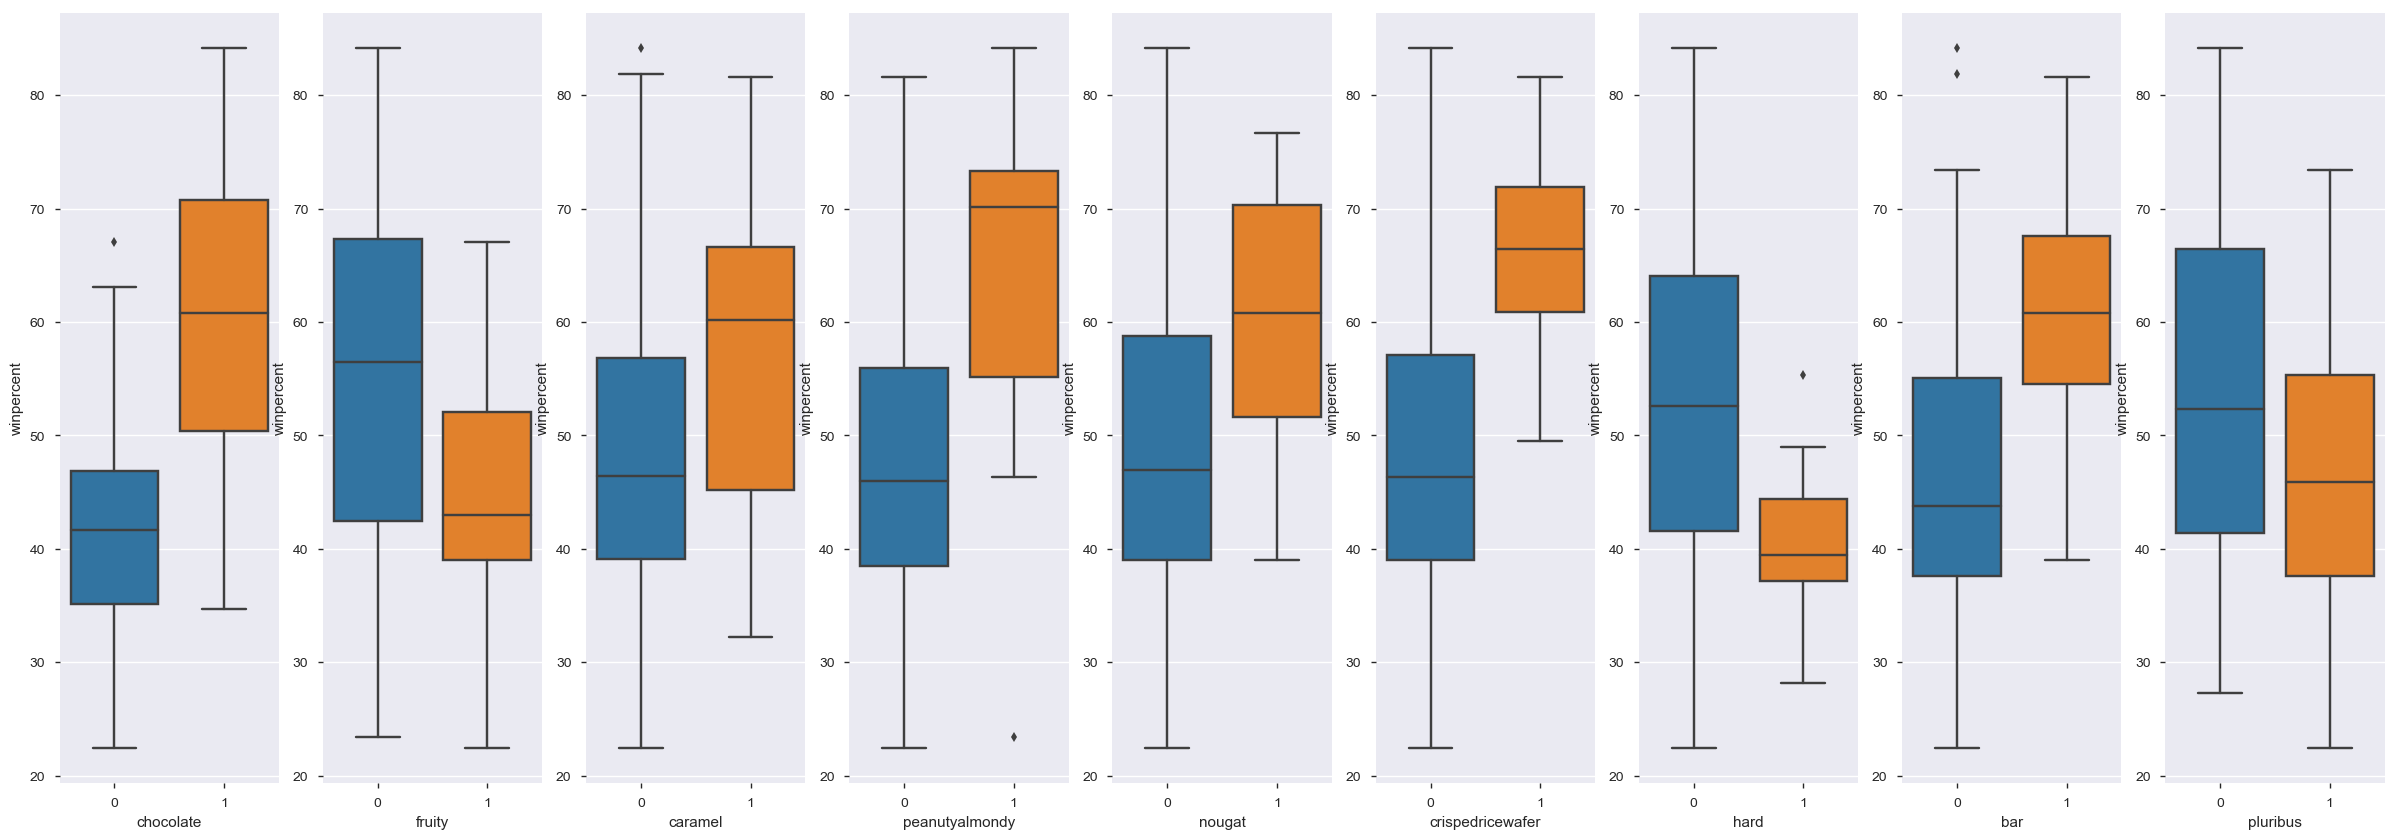

In [47]:
fig,axes=plt.subplots(1,9,figsize=(30,10))
for idx,cols in enumerate(list(source_data.columns)[1:10]):
    sns.boxplot(x=cols, y='winpercent', data=source_data, ax=axes[idx],showfliers=True)
plt.show()

_Observations_
<br>
1.From the above plot, it can be observed that 60% people like chocolate candies. So, it is an important parameter.
<br>
2.From the above plot, it can be observed that 60% people like fruity candies. So, it is an important parameter.
<br>
3.From the above plot, it can be observed that 60% people like caramel candies. So, it is an important parameter.
<br>
4.From the above plot, it can be observed that 70% people like peanut/almond candies. So, it is an important parameter.
<br>
5.

### Is there a relationship between sugarpercent and winpercent?

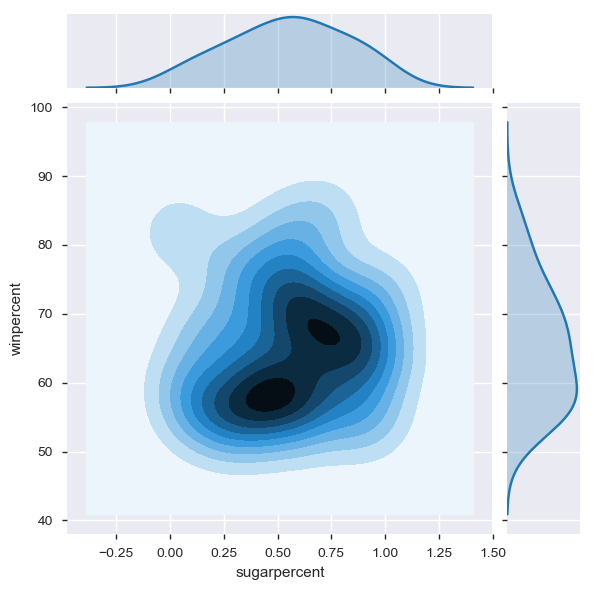

In [49]:
sns.jointplot(x="sugarpercent", y="winpercent", data=winners,kind="kde")

_Observation_
1. From the above plot, it can be observed that the amount of sugar present in the candy does not favour the candy.

### Is there a relationship between pricepercent and winpercent?

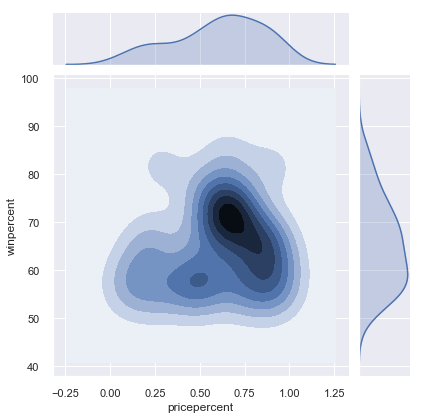

In [52]:
sns.jointplot(x="pricepercent", y="winpercent", data=winners,kind="kde")

_Observation-
1. From the above plot, it can be observed that the cost of the candy does not contribute to best favoured candy.

### Most Popular and the least popular candy

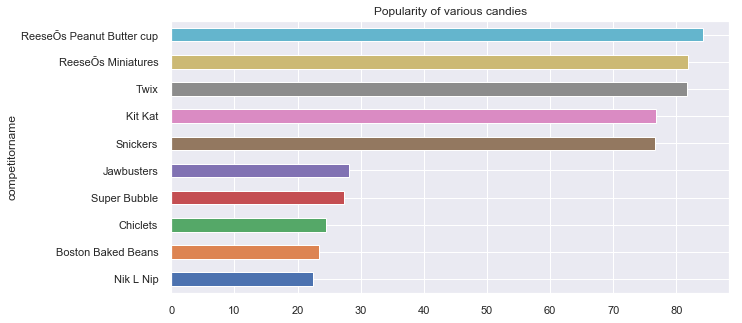

In [55]:
popularity = source_data[['competitorname','winpercent']].sort_values(by='winpercent')
pd.concat([popularity.head(5),popularity.tail(5)],axis=0).plot(x='competitorname',y='winpercent',kind='barh',
title='Popularity of various candies',sort_columns=True,figsize = (10,5),legend=False)

_Observation_
1. From the above plot, it can be concluded that Reeses Peanut butter cup is the most popular candy and Nik L Nip is the least popular candy, This has concluded based on the winpercentage.

### Identifying the components that make good candy

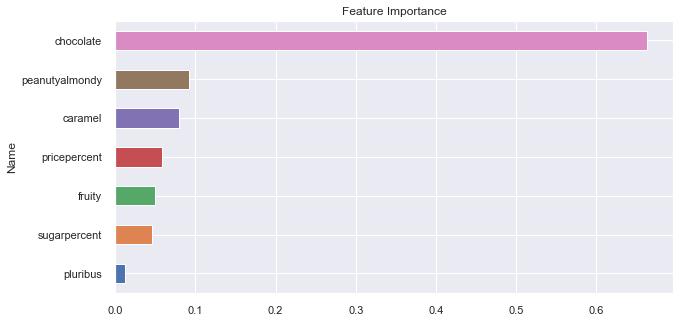

In [67]:
from sklearn import tree
reg = tree.DecisionTreeRegressor(max_depth=3).fit(source_data[source_data.columns[1:-1]],source_data[source_data.columns[-1]])
imp = pd.DataFrame.from_dict({'Name':source_data.columns[1:-1],'Importance':reg.feature_importances_})
imp_plt = imp.sort_values(by='Importance',ascending=True).reset_index(drop=True)
imp_plt[imp_plt.Importance>0].plot(kind='barh',x='Name',y='Importance',title='Feature Importance',sort_columns=True,figsize = (10,5),legend=False)

From the above plot, it can be concluded that,chocolate is the component that makes good candy. This has concluded based on the winpercentage


##Model Training

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(source_data[source_data.columns[1:-1]],source_data[source_data.columns[-1]], test_size=0.33, random_state=42)
rmse_err = 1[]

In [10]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5).fit(X_train,y_train)
rmse_err.append(math.sqrt(mean_squared_error(y_test,reg.predict(X_test))))
rmse_err[-1]

13.206377760339867

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=200).fit(X_train,y_train)
rmse_err.append(math.sqrt(mean_squared_error(y_test,rf_reg.predict(X_test))))
rmse_err[-1]

11.175480726216112

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)

lg = LinearRegression().fit(X_, y_train)

rmse_err.append(math.sqrt(mean_squared_error(y_test,lg.predict(X_test_))))
rmse_err[-1]

43.52861890608821

In [13]:
from sklearn.linear_model import BayesianRidge
b_reg = BayesianRidge().fit(X_train,y_train)
rmse_err.append(math.sqrt(mean_squared_error(y_test,b_reg.predict(X_test))))
rmse_err[-1]

11.70597154428333

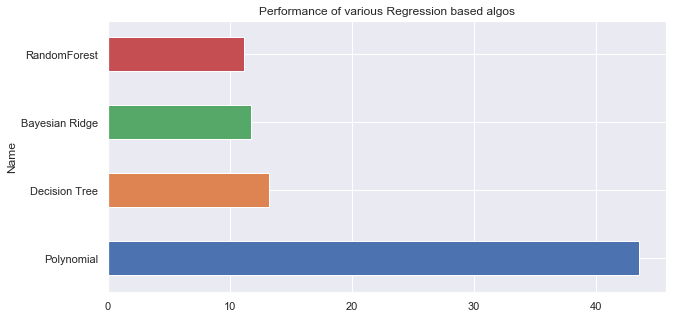

In [16]:
models = ['Decision Tree','RandomForest','Polynomial','Bayesian Ridge']
pd.DataFrame.from_dict({'Name':models,'RMSE':rmse_err}).sort_values(by='RMSE',ascending=False).plot(x='Name',y='RMSE',kind='barh',sort_columns=True,figsize = (10,5),legend=False,title='Performance of various Regression based algos')